### 1. Import bibliotek
#### 🇬🇧 Import libraries 

In [1]:
import fastai

In [35]:
!pip install fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize



import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [36]:

path = Path('data') # replace with the path to your local directory containing the "dog" and "cat" folders


### 2. Trenowanie modelu
#### 🇬🇧 Model training

In [37]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [27]:
data = data.new(
    item_tfms=RandomResizedCrop(128, min_scale=0.5), # określamy ilość materiałów treningowych oraz walidacyjnych, wielkość zdjęć, augmentację
    batch_tfms=aug_transforms(max_rotate=2.0)
)


dls = data.dataloaders(path, bs = 32, num_workers = 0)
# w fastai 2.0 dane przedstawiane są w formie DataBlock, to tutaj dokonujemy augmentacji danych

In [38]:

path_dog = Path('data/dog') # replace with the path to your local directory containing the "dog" images
path_cat = Path('data/cat') # replace with the path to your local directory containing the "cat" images

verify_images(path_dog.ls())
verify_images(path_cat.ls())

(#0) []

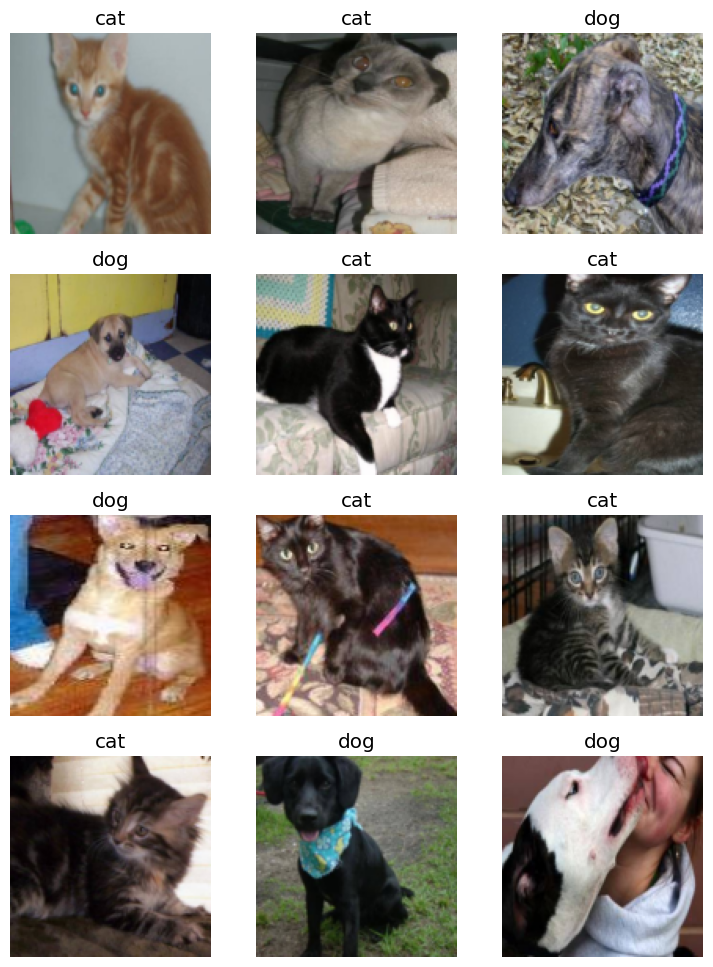

In [39]:
dls.valid.show_batch(max_n=12, nrows=4)

In [40]:
learn = vision_learner(dls, alexnet, metrics=accuracy)

In [42]:
learn.fit(9)

epoch,train_loss,valid_loss,accuracy,time
0,0.183609,0.545024,0.790323,00:01
1,0.199099,0.539092,0.806452,00:01
2,0.221025,0.488396,0.854839,00:01
3,0.216618,0.486027,0.854839,00:01
4,0.204696,0.506222,0.790323,00:01
5,0.197834,0.535027,0.806452,00:01
6,0.187796,0.532867,0.806452,00:01
7,0.195823,0.574650,0.822581,00:01
8,0.200236,0.590952,0.822581,00:01


In [32]:
learn.export(fname='model.pkl')

Dalszą część pracy wykonujemy w skrypcie app.py - chcemy zbudować aplikację do stworzonego przez nas modelu w Streamlit.